# ECG and ECG Signal
ECG stands for Electrocardiogram which is a medical test to measures the electrical activity of the heartbeat. An electrical waveform generates through heart on each beat. ECG Signal consist of following components i.e segment, interval, waveform based on sized and time intervals.  Cardiac rhythm type is determined by studying these different components. Abnormal rhythm of the heart called arrhythmia. 

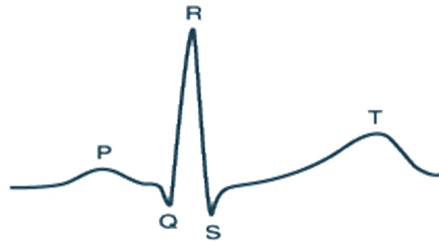
 

The parameters used for the analysis of the QRS complex are QRS duration6, R-R interval and heart rate of the signals. These parameters are described below. QRS duration: The duration of QRS complex of ECG is found by dividing the number of samples between the QRS complex and the sampling frequency of the signal7. By knowing this duration, we can know whether the signal is abnormal or normal8. As per the standards, the standard QRS duration of a normal ECG signal will rangefrom 0.06 to 0.10 seconds.
R-R interval: R-peak is the longest amplitude peak in ECG signal. The R-R interval is calculated by dividing number of samples between two R peaks and sampling frequency of the signal. It plays a vital role in finding abnormalities of a signal. 

Heart rate: Heart rate can be measured by using the formulae shown in Equation (1).

                                    Heart rate=60 /RR interval in seconds   (1)

A healthy person’s average rate of heart beat is 72 beats per minute. For a normal person, it will be in between 70–80 beats per minute. In a normal sinus rhythm, bradycardia means a resting heart rate of below 60 bpm and tachycardia will have a heart rate above 90 bpm.[1]


# Question No.4
Opens the provided ECG signal (aami3a.dat) and plots it. This file contains one ECG signal
sampled at 720Hz with 12-bit resolution.

43081


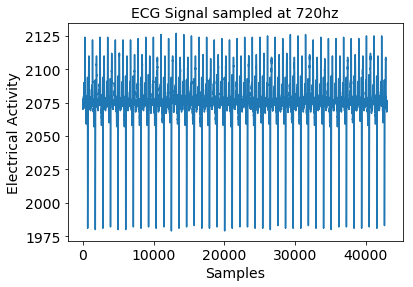

In [11]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline
#%matplotlib nbagg

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

#we use a simple open command for the file (basic Python)
f = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
print(len(AllSignal))
x=np.arange(0,len(AllSignal),1) # 720 HZ
plt.plot(x,AllSignal)
plt.title('ECG Signal sampled at 720hz',fontsize=14)
plt.xlabel('Samples')
plt.ylabel('Electrical Activity',fontsize=14) #reduce x n y label
f.close() #close the file

# Question No.5 

If a person at rest has an average heart rate between 60 and 100 beats per minute, how many samples should you plot to obtain 5 beats in the signal?

Estimated Samples = Sampleing Frequecy*Number of Beats

720*5= 3600 (approximatly)

Therefore to plot 5 beats we need 3600 approximatly.

# Question No.6 

Plot a zoom-in of the signal where 5 cardiac cycles can be observed considering this person has a cardiac cycle of 60 beats/minute 

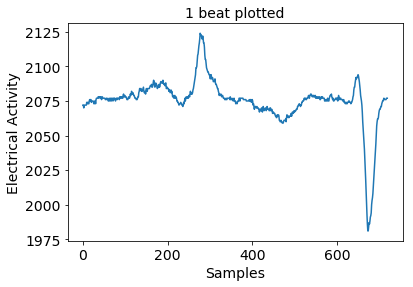

In [2]:
# Question 6, Show 1 beats
x=np.arange(0,720,1) # 720 HZ
plt.plot(x,AllSignal[:720])
plt.title('1 beat plotted',fontsize=14)
plt.xlabel('Samples')
plt.ylabel('Electrical Activity',fontsize=14) #reduce x n y label

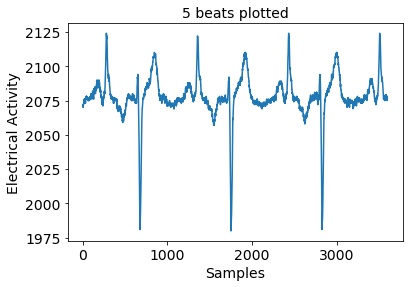

In [3]:
# Question 6, Show 5 beats
x=np.arange(0,720*5,1) # 720 HZ
plt.plot(x,AllSignal[:720*5])
plt.title('5 beats plotted',fontsize=14)
plt.xlabel('Samples')
plt.ylabel('Electrical Activity',fontsize=14) #reduce x n y label

# Question No.7

Considering that an ECG typical signal has the following shape, Was the heart rate lower or higher for this individual?

Ans-

The heart rate of the individual is normal. As in question no.6 we considering the heart rate 60 BPM. A healthy person’s average rate of heart beat is 72 beats per minute. For a normal person, it will be in between 70–80 beats per minute. In a normal sinus rhythm, bradycardia means a resting heart rate of below 60 bpm and tachycardia will have a heart rate above 90 bpm. [1] 

# Question No.8

Estimate the heart rate of this individual in beats/minute? 

Ans-

The Heart rate = 72. 


In [13]:
sortedSignals = AllSignal;
sortedSignals.sort();
npySignalarry = np.array(AllSignal)

r1 = sortedSignals[(len(sortedSignals)-1)]; #max value
r2 = sortedSignals[(len(sortedSignals)-2)]; #second highest peak

print("r1",r1)
print("r2",r2)

rIndex1 = np.where(npySignalarry == r1);
rIndex2 = np.where(npySignalarry == r2);

rIndex1 = (rIndex1[0])[0]
rIndex2 = (rIndex2[0])[0]

print("rIndex1",rIndex1);
print("rIndex2",rIndex2);

sampleCount = len(AllSignal[rIndex2:rIndex1]);
print("sampleCount",sampleCount)

heartBeat = 60/(sampleCount / 720);
print("Heartrate",heartBeat);

r1 2127
r2 2126
rIndex1 43080
rIndex2 43074
sampleCount 6
Heartrate 7200.0


# Question No.9

Obtain the DFT of the signal and plot the full spectrum?

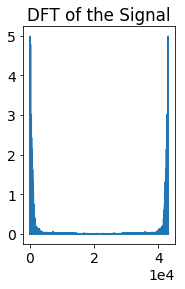

In [5]:
#we first eliminate dc
dataF=AllSignal-np.mean(AllSignal)
L=len(dataF)

Y=np.fft.fft(dataF)
Pyy=abs(Y)/L

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,len(Pyy),1)

fig = plt.figure()
plt.subplot(221)
plt.subplot(121)
plt.plot(f, Pyy) #[:7500]
plt.title('DFT of the Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), fontsize=14)

# Question No.10

Obtain the frequency at which the maximum is observed?

In [7]:
maxFqy = np.amax(AllSignal)#where(f>720)
print("Max Frequency",maxFqy)

Max Frequency 2127


# Question No.11

From the spectrum, what is your calculation for the heart rate in beats/minute?

Ans- 

The general formula for the Heart rate is 

Heart rate=60 /RR interval in seconds

From the spectrum I calculated two highest R peaks and measure the R-R interval by dividing samples between two R peaks and samling frequecy i.e. 720Hz

R-R Intervals in Sec = 6/ 8.33e-6

Heart Rate = 72 BPM


# Question No.12

Discuss in the Markdown the peaks observed in the spectrum and what information they provide, in particular, explain how can you obtain from the frequency peaks the heart rate?

Ans-

The peaks provides the maximum in the spectrum. By using this the two highest peak we can calculate the R-R interval and after that we can put the R-R interval in formaula for heart rate i.e. 

                                    Heart rate=60 /RR interval in seconds
                                  
By the above fromula we can measure the heart rate. 


# Question No.13

Discuss in the markdown: if you needed to ﬁlter this signal (it is quite clean here), would it be a problem to aﬀect the amplitude of the signal? Use references to justify your answer?

Ans- 

The butter worth low pass filter attenuate the ECG Signal and reduce the noise and by using 4th order butter worth filter the ECG amplitude slighlty improved due to the rejection of power line noise.[2]




# Question No.14 & 15

Filter your signal using a digital low-pass Butterworth ﬁlter of order 4 that cuts frequencies above 100Hz?
Provide a plot with the frequency response of the ﬁlter


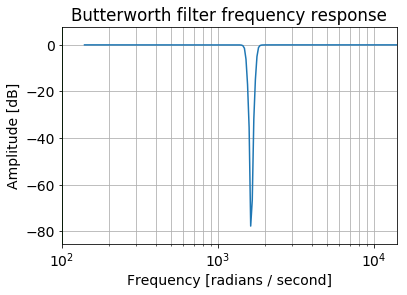

In [10]:
from scipy import signal

#Getting it ready to filter 100 Hz
fs=1.4e-3;
fc1=1.8e3;
fc2=1.5e3;
fc3=4.10e3;
fc4=0.7e3;

b, a = signal.butter(4, [fc1/fs,fc2/fs,fc3/fs,fc4/fs], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
wf=w*fs;
plt.plot(wf, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

# Question No.16

Obtain the DFT of the ﬁltered signal and plot the full spectrum after ﬁltering?

15000


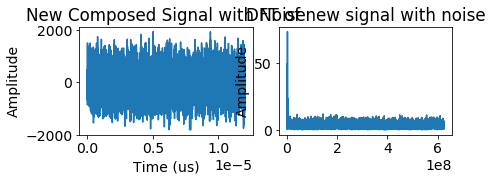

In [9]:
#Adding the noise
ns = 500*np.random.normal(0,1,15000)
t=np.arange(0,12e-6,0.0008e-6) #time vector
AllSignalN = 50*np.sin(2*np.pi*1e6*t)+100*np.sin(2*np.pi*2e6*t)+150*np.sin(2*np.pi*3e6*t)+40*np.sin(2*np.pi*5e6*t) #new composed signal
AllSignalNs=AllSignalN+ns
#Plotting the new signal
plt.subplot(221)
plt.tight_layout()
plt.plot(t,AllSignalNs)
plt.title('New Composed Signal with Noise')
plt.xlabel('Time (us)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
L=len(AllSignalNs)
f=np.arange(0,1.25e9/2,1.25e9/15000)
Y=np.fft.fft(AllSignalNs)
Pyy=abs(Y)/L
print(len(Pyy))
plt.subplot(222)
plt.plot(f, Pyy[:7500])
plt.title('DFT of new signal with noise')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Question No.17

Discuss in the markdown the eﬀects that your ﬁlter may have on any interpretation of the heart rate, did it aﬀect it? why? why not? Explain.

Ans- 

The filter we use above will have the poisitive effect on signal and improve the signal because we use 4th order in which we have 4 capacitors which will help us to reduce power line noise and improve the signal.


#  References

1-Suresh, V., Rao, S. K., Thiagarajan, G., & Das, R. P. (2016). Denoising and Detecting Discontinuities using Wavelets. Indian Journal of Science and Technology, 9, 19.

2- Robertson, D. G. E., Barden, J. M., & Dowling, J. (1993). Response characteristics of different Butterworth low-pass digital filters. Journal of Biomechanics, 26(3), 299.

3- Changpuak, A. C. (n.d.). Online Engineering Calculator :: Active Butterworth Lowpass Filter Calculator. Retrieved October 22, 2017, from http://www.changpuak.ch/electronics/Butterworth_Lowpass_active_24dB.php 

